# Exploratory Data Analysis

In [1]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

import hubmap

In [2]:
train_df = pandas.read_csv(hubmap.utils.paths.TRAIN_CSV)
train_df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female


## Notes (train.csv)

1. There are `351` rows.
2. `organ` is one of `['kidney', 'largeintestine', 'lung', 'prostate', 'spleen']`.
3. `data_source` is always `'HPA'`.
4. All images are square and the sizes are one of `[2308, 2416, 2511, 2539, 2593, 2630, 2631, 2654, 2675, 2680, 2727, 2760, 2764, 2783, 2790, 2867, 2869, 2942, 3000, 3070]`.
5. `pixel_size` is always `0.4` micro-meters.
6. `tissue_thickness` is always `4` micro-meters.
7. `age` is one of `[21, 28, 37, 41, 43, 47, 48, 49, 50, 55, 56, 57, 59, 60, 61, 65, 67, 68, 70, 72, 73, 74, 76, 78, 79, 82, 83, 84]`.
8. `sex` is one of `['Female', 'Male']`.

## Looking at a single image

In [3]:
image_id = 10044
path = hubmap.utils.paths.TRAIN_IMAGES.joinpath(f'{image_id}.tiff')
assert path.exists(), f'Path not found: {path}'

In [4]:
image = numpy.squeeze(pyplot.imread(path))

In [5]:
rle = train_df[train_df.id == image_id]['rle'].iloc[-1]
(height, width, _) = image.shape
mask = hubmap.utils.helpers.rle_to_mask(rle, height, width)

(-0.5, 2999.5, 2999.5, -0.5)

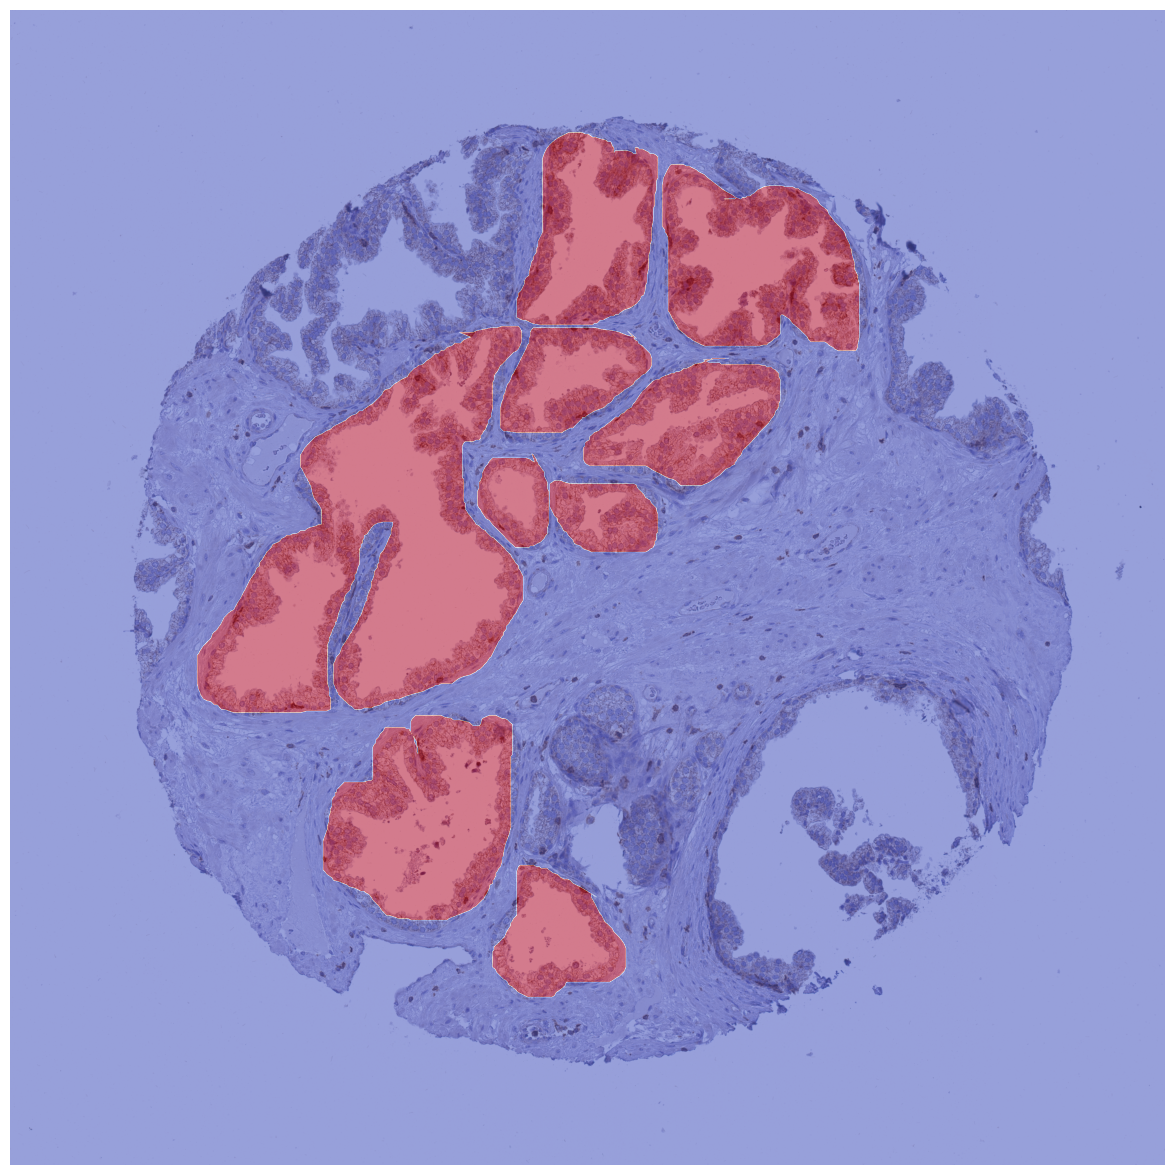

In [6]:
pyplot.figure(figsize=(15, 15))
pyplot.imshow(image)
pyplot.imshow(mask, cmap='coolwarm', alpha=0.5)
pyplot.axis("off")

## organ

Text(0.5, 1.0, 'Organ Counts')

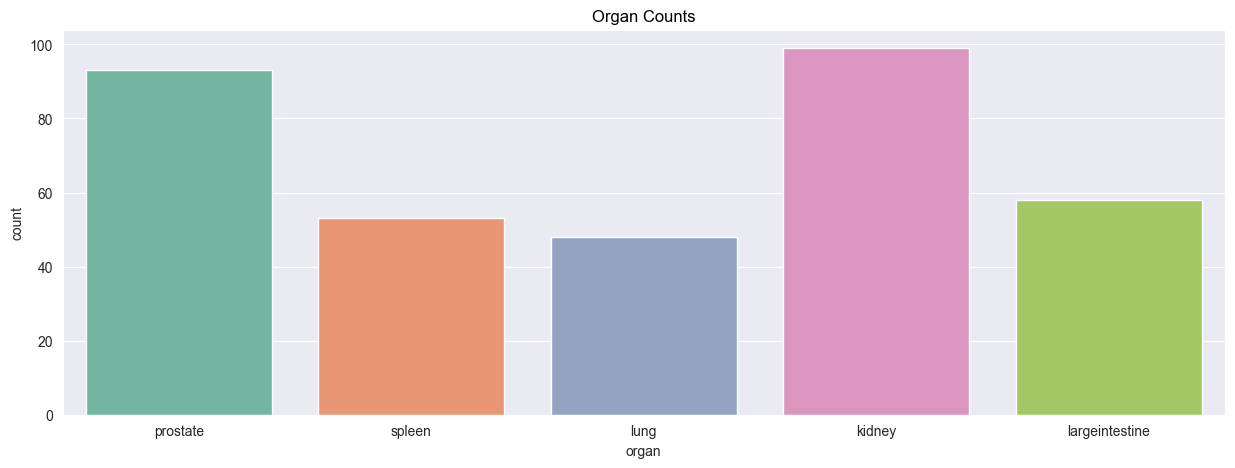

In [7]:
pyplot.figure(figsize=(15, 5))
g = seaborn.countplot(data=train_df, x="organ", palette=seaborn.color_palette("Set2", 8))
g.set_title("Organ Counts", color = "black")

## age

Text(0.5, 1.0, 'Age')

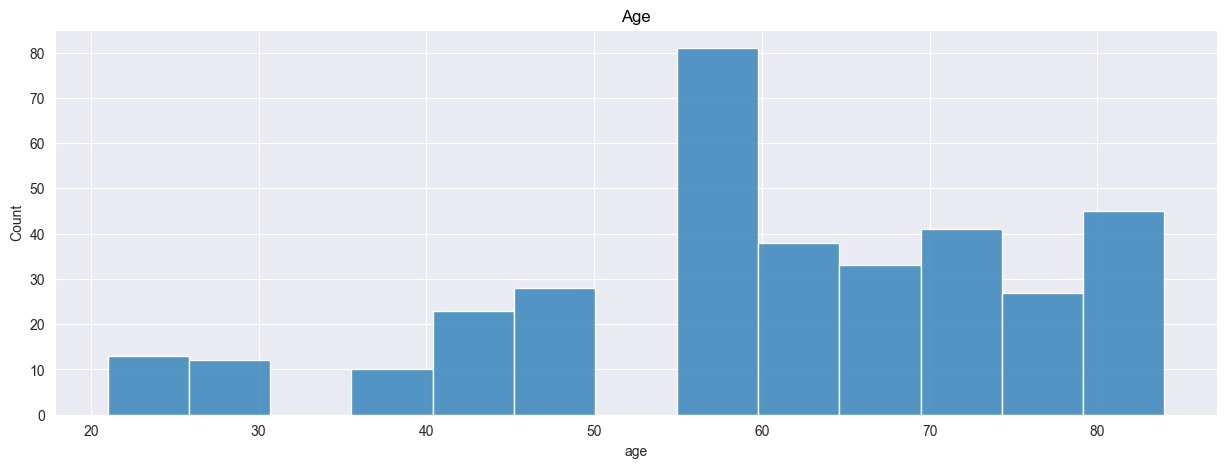

In [8]:
pyplot.figure(figsize=(15, 5))
g = seaborn.histplot(data=train_df, x="age", palette=seaborn.color_palette("Set2", 8))
g.set_title("Age", color = "black")

## sex

Text(0.5, 1.0, 'Sex')

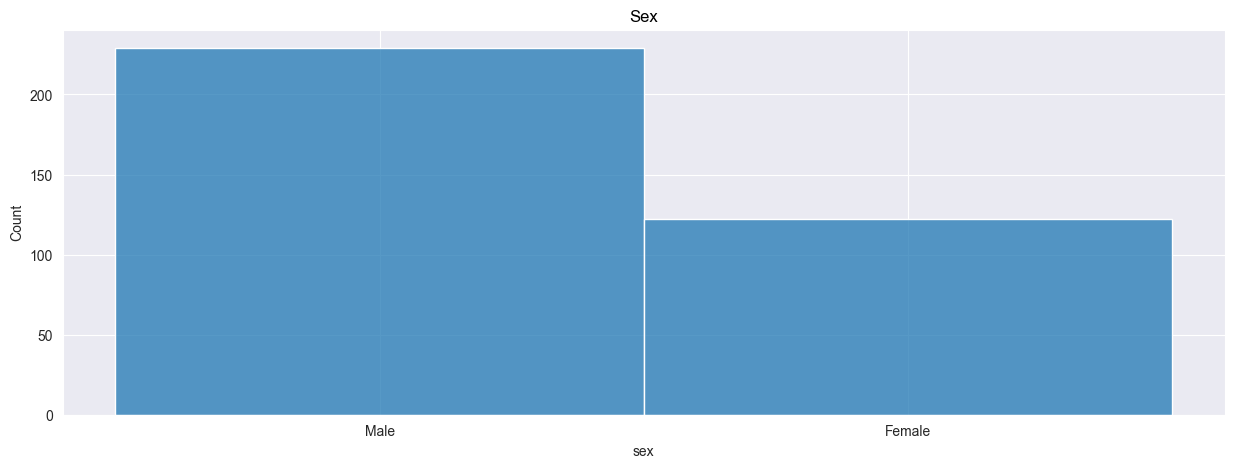

In [9]:
pyplot.figure(figsize=(15, 5))
g = seaborn.histplot(data=train_df, x="sex", palette=seaborn.color_palette("Set2", 8))
g.set_title("Sex", color = "black")

Text(0.5, 1.0, 'Image height/width')

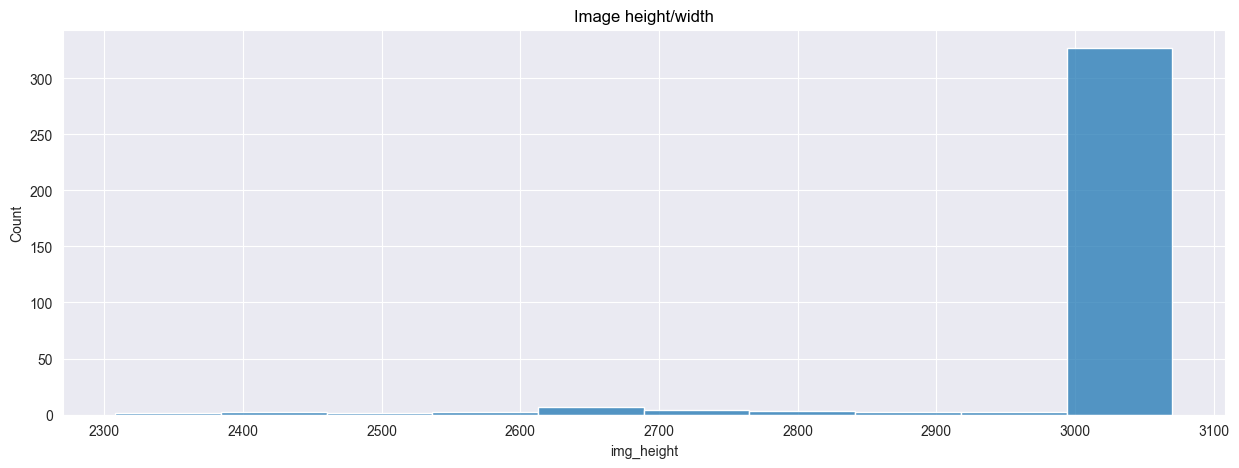

In [10]:
pyplot.figure(figsize=(15, 5))
g = seaborn.histplot(data=train_df, x="img_height", palette=seaborn.color_palette("Set2", 8))
g.set_title("Image height/width", color = "black")

(-0.5, 2999.5, 2999.5, -0.5)

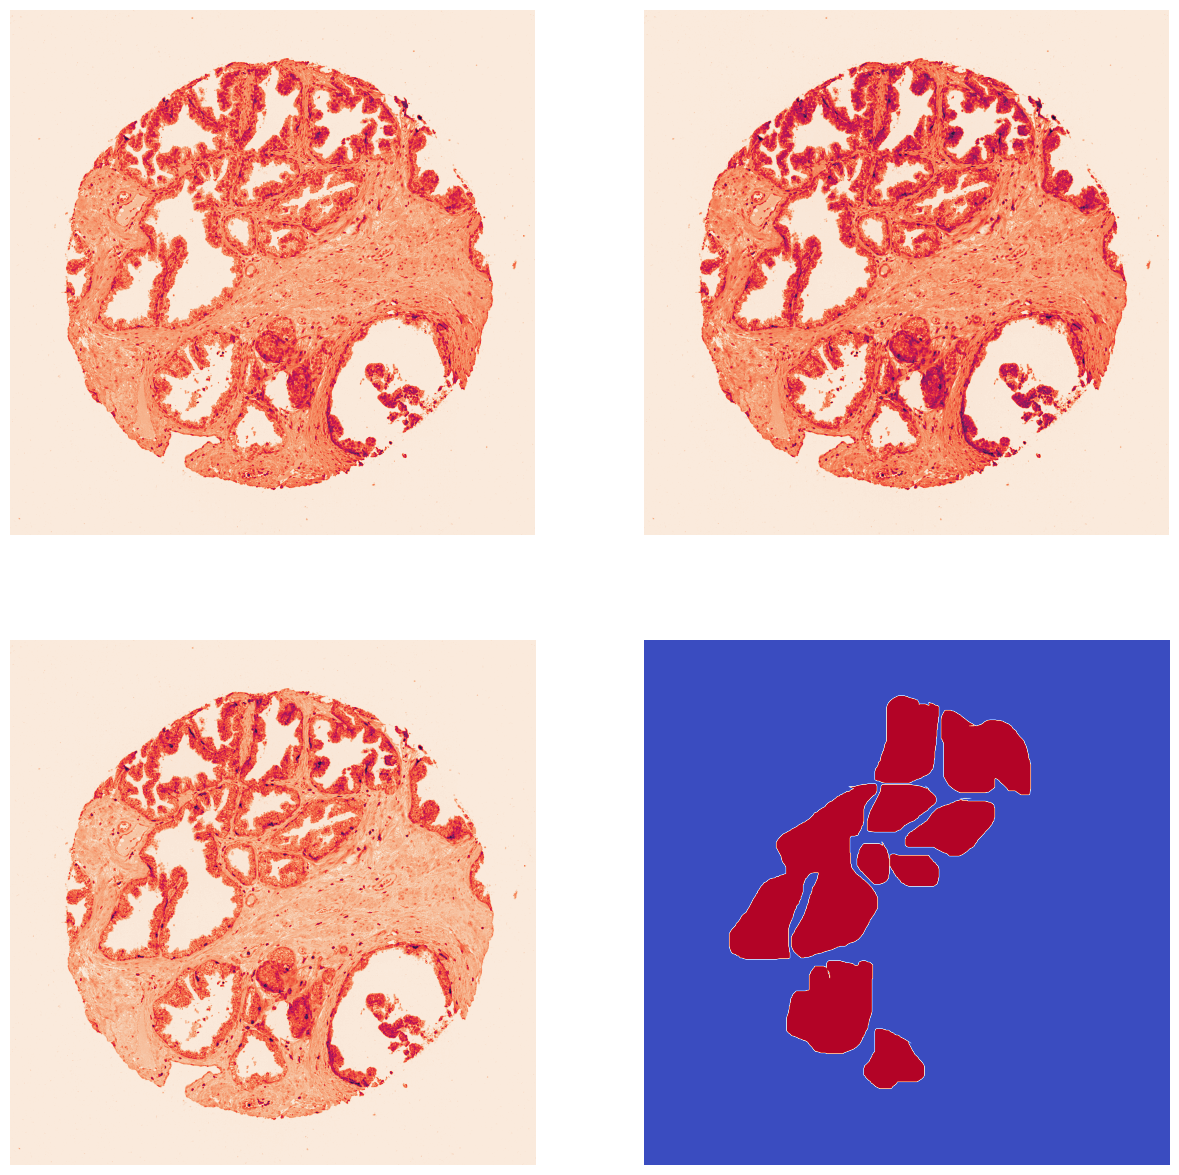

In [12]:
figure, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(2, 2, figsize=(15, 15))
ax1.imshow(image[..., 0])
ax1.axis('off')
ax2.imshow(image[..., 1])
ax2.axis('off')
ax3.imshow(image[..., 2])
ax3.axis('off')
ax4.imshow(mask, cmap='coolwarm')
ax4.axis('off')